In [1]:
# Import libraries
import numpy as np
import pandas as pd

from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
from sklearn.metrics import mean_absolute_error
print(tf.__version__)

2.7.0


In [2]:
# Read in small dataset
meth = pd.read_csv('Endometriosis_subset_train_feature_extract.csv')

In [3]:
meth

,meth_id,meth_id.1,Endometriosis,Cycle_Phase,Stage,Institute,Batch,cg16026189,cg01508988,cg08899471,...,cg04559824,cg19861048,cg21779088,cg01922485,cg20435334,cg19413397,cg16045223,cg15105996,cg25973293,cg19092396
0,202184900058_R06C01,202184900058_R06C01,Yes,PE,I-II,UCSF,1,3.999850,-2.839540,2.001039,...,2.170693,1.953526,4.639270,5.184312,2.992010,2.202932,0.715139,-0.007355,5.029478,-2.660539
1,202229250043_R05C01,202229250043_R05C01,Yes,PE,I-II,UCSF,1,3.950770,-2.378813,2.240852,...,2.288927,1.805602,3.953061,4.739814,2.701177,2.320819,1.290945,-0.080173,4.304394,-2.970099
2,202835130042_R05C01,202835130042_R05C01,No,SE,CONTROL,Oxford,2,3.437832,-2.758592,2.139899,...,2.306523,1.853160,4.021908,5.044741,3.012121,2.027369,1.369375,0.101884,5.096871,-2.350843
3,202878330078_R03C01,202878330078_R03C01,No,SE,CONTROL,Oxford,2,2.420163,-2.528663,1.562888,...,2.656391,2.037115,3.859788,4.760932,2.746935,2.931939,0.703797,-0.145170,5.233263,-3.195751
4,201985320094_R05C01,201985320094_R05C01,No,SE,CONTROL,UCSF,1,3.413458,-2.563598,2.160956,...,2.456700,1.654236,4.335523,4.955000,3.078684,2.177536,0.073913,0.191024,4.959508,-2.791019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,201904640205_R06C01,201904640205_R06C01,No,PE,CONTROL,Oxford,1,3.599834,-2.583206,2.097334,...,2.395430,1.672504,3.990722,4.732229,2.472473,2.244349,0.606351,-0.071320,3.924035,-2.131066
796,202878330112_R02C01,202878330112_R02C01,No,SE,CONTROL,MAMC,2,3.670592,-2.611249,2.435342,...,2.253329,1.901001,3.377173,4.961262,2.725664,2.645324,1.009227,-0.052745,5.326494,-2.168397
797,202878330113_R05C01,202878330113_R05C01,Yes,SE,I-II,MAMC,2,3.800672,-2.730738,2.521438,...,2.282470,1.632305,4.518949,4.957544,2.673847,2.411982,0.521026,0.019522,5.110144,-2.695156
798,202176300030_R04C01,202176300030_R04C01,Yes,SE,III-IV,"IMB, UQ",1,3.989571,-2.569906,2.959877,...,2.306185,1.903472,4.157781,5.057137,2.818165,2.692087,0.481266,0.067410,4.538736,-1.900375


In [4]:
# Set axis to IDs
meth.set_axis(meth['meth_id'], inplace = True)

In [5]:
# Drop the ID cols 
cols_drop = ['meth_id', 'meth_id.1']
meth.drop(columns=cols_drop, inplace = True)

In [6]:
# Change Endo Yes/No to binary
meth['Endometriosis_int'] = np.where(meth['Endometriosis'] == 'Yes', 1, meth['Endometriosis'])
meth['Endometriosis_int'] = np.where(meth['Endometriosis_int'] == 'No', 0, meth['Endometriosis_int'])

In [7]:
meth

,Endometriosis,Cycle_Phase,Stage,Institute,Batch,cg16026189,cg01508988,cg08899471,cg13897348,cg27477059,...,cg19861048,cg21779088,cg01922485,cg20435334,cg19413397,cg16045223,cg15105996,cg25973293,cg19092396,Endometriosis_int
meth_id,,,,,,,,,,,,,,,,,,,,,
202184900058_R06C01,Yes,PE,I-II,UCSF,1,3.999850,-2.839540,2.001039,-2.790806,3.036225,...,1.953526,4.639270,5.184312,2.992010,2.202932,0.715139,-0.007355,5.029478,-2.660539,1
202229250043_R05C01,Yes,PE,I-II,UCSF,1,3.950770,-2.378813,2.240852,-2.954704,2.704513,...,1.805602,3.953061,4.739814,2.701177,2.320819,1.290945,-0.080173,4.304394,-2.970099,1
202835130042_R05C01,No,SE,CONTROL,Oxford,2,3.437832,-2.758592,2.139899,-2.823325,2.969324,...,1.853160,4.021908,5.044741,3.012121,2.027369,1.369375,0.101884,5.096871,-2.350843,0
202878330078_R03C01,No,SE,CONTROL,Oxford,2,2.420163,-2.528663,1.562888,-1.974657,2.926104,...,2.037115,3.859788,4.760932,2.746935,2.931939,0.703797,-0.145170,5.233263,-3.195751,0
201985320094_R05C01,No,SE,CONTROL,UCSF,1,3.413458,-2.563598,2.160956,-1.804074,2.563266,...,1.654236,4.335523,4.955000,3.078684,2.177536,0.073913,0.191024,4.959508,-2.791019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201904640205_R06C01,No,PE,CONTROL,Oxford,1,3.599834,-2.583206,2.097334,-2.322379,3.099335,...,1.672504,3.990722,4.732229,2.472473,2.244349,0.606351,-0.071320,3.924035,-2.131066,0
202878330112_R02C01,No,SE,CONTROL,MAMC,2,3.670592,-2.611249,2.435342,-2.742501,3.023715,...,1.901001,3.377173,4.961262,2.725664,2.645324,1.009227,-0.052745,5.326494,-2.168397,0
202878330113_R05C01,Yes,SE,I-II,MAMC,2,3.800672,-2.730738,2.521438,-2.119614,3.076722,...,1.632305,4.518949,4.957544,2.673847,2.411982,0.521026,0.019522,5.110144,-2.695156,1


In [8]:
# Split dataset into features and target 
x_train = meth.iloc[:, np.r_[5:103]]
y_train = meth['Endometriosis_int']

In [9]:
test = pd.read_csv('Endometriosis_subset_test_feature_extract.csv')
test

,meth_id,cg16026189,cg01508988,cg08899471,cg13897348,cg27477059,cg27302190,cg20426768,cg17142931,cg04972348,...,cg19861048,cg21779088,cg01922485,cg20435334,cg19413397,cg16045223,cg15105996,cg25973293,cg19092396,Endometriosis_int
0,202878330076_R05C01,3.097823,-2.539343,2.046007,-2.478576,2.563572,1.965384,0.801510,-0.090231,0.207092,...,1.752006,3.604724,5.075303,2.698030,1.942857,0.706064,-0.162937,4.262236,-2.779906,1
1,202835130054_R08C01,3.938173,-2.340656,2.661644,-2.422570,3.155311,2.241019,0.850654,-0.079164,0.270008,...,1.701143,4.203569,4.793561,2.800377,1.822075,1.073474,-0.141250,5.361843,-2.996784,1
2,202212330173_R07C01,3.345793,-2.804006,1.974256,-2.452216,2.525939,2.506842,0.983303,-0.018804,0.100521,...,1.879855,4.217157,5.218384,2.731195,2.057755,1.265913,-0.090030,5.607344,-2.471398,0
3,202013790074_R03C01,3.969819,-2.698969,2.352478,-2.081186,2.999481,2.229723,0.643564,0.152019,0.301779,...,1.842984,4.591365,5.010892,2.673438,1.751546,0.416211,-0.021706,5.495211,-2.173185,0
4,202013790112_R01C01,3.549663,-2.568295,3.376154,-2.423115,2.146287,2.130650,0.696030,0.014172,-0.046671,...,2.204294,4.287095,5.069371,2.125303,1.331066,0.254350,-0.033212,4.786351,-2.640720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,202878330113_R04C01,4.068682,-2.615262,2.053700,-2.048839,2.720034,2.082817,0.738916,-0.027239,0.029772,...,1.906852,3.914902,4.962997,2.868262,2.207983,0.779436,-0.237913,4.856758,-2.335723,1
196,201959750123_R03C01,3.089680,-2.867233,1.812105,-2.384390,2.959038,1.991487,0.710367,0.245171,0.358773,...,1.957210,4.349414,4.931962,2.373272,2.632968,0.416159,0.002128,4.819631,-1.325193,1
197,201980430093_R08C01,4.213825,-2.562396,2.000722,-2.273870,2.961984,2.493231,0.876843,-0.080069,0.210484,...,1.992776,4.178355,5.150082,2.854601,2.448002,0.615261,-0.091837,4.638254,-2.187200,1
198,202852840086_R03C01,4.056929,-2.530856,2.938360,-2.506915,2.900419,2.632102,0.934158,0.074507,0.261165,...,1.725582,4.164535,4.948845,2.514134,1.753669,0.647173,-0.075875,5.120703,-2.864255,1


In [10]:
test = test.set_axis(test['meth_id'])

In [11]:
test

,meth_id,cg16026189,cg01508988,cg08899471,cg13897348,cg27477059,cg27302190,cg20426768,cg17142931,cg04972348,...,cg19861048,cg21779088,cg01922485,cg20435334,cg19413397,cg16045223,cg15105996,cg25973293,cg19092396,Endometriosis_int
meth_id,,,,,,,,,,,,,,,,,,,,,
202878330076_R05C01,202878330076_R05C01,3.097823,-2.539343,2.046007,-2.478576,2.563572,1.965384,0.801510,-0.090231,0.207092,...,1.752006,3.604724,5.075303,2.698030,1.942857,0.706064,-0.162937,4.262236,-2.779906,1
202835130054_R08C01,202835130054_R08C01,3.938173,-2.340656,2.661644,-2.422570,3.155311,2.241019,0.850654,-0.079164,0.270008,...,1.701143,4.203569,4.793561,2.800377,1.822075,1.073474,-0.141250,5.361843,-2.996784,1
202212330173_R07C01,202212330173_R07C01,3.345793,-2.804006,1.974256,-2.452216,2.525939,2.506842,0.983303,-0.018804,0.100521,...,1.879855,4.217157,5.218384,2.731195,2.057755,1.265913,-0.090030,5.607344,-2.471398,0
202013790074_R03C01,202013790074_R03C01,3.969819,-2.698969,2.352478,-2.081186,2.999481,2.229723,0.643564,0.152019,0.301779,...,1.842984,4.591365,5.010892,2.673438,1.751546,0.416211,-0.021706,5.495211,-2.173185,0
202013790112_R01C01,202013790112_R01C01,3.549663,-2.568295,3.376154,-2.423115,2.146287,2.130650,0.696030,0.014172,-0.046671,...,2.204294,4.287095,5.069371,2.125303,1.331066,0.254350,-0.033212,4.786351,-2.640720,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202878330113_R04C01,202878330113_R04C01,4.068682,-2.615262,2.053700,-2.048839,2.720034,2.082817,0.738916,-0.027239,0.029772,...,1.906852,3.914902,4.962997,2.868262,2.207983,0.779436,-0.237913,4.856758,-2.335723,1
201959750123_R03C01,201959750123_R03C01,3.089680,-2.867233,1.812105,-2.384390,2.959038,1.991487,0.710367,0.245171,0.358773,...,1.957210,4.349414,4.931962,2.373272,2.632968,0.416159,0.002128,4.819631,-1.325193,1
201980430093_R08C01,201980430093_R08C01,4.213825,-2.562396,2.000722,-2.273870,2.961984,2.493231,0.876843,-0.080069,0.210484,...,1.992776,4.178355,5.150082,2.854601,2.448002,0.615261,-0.091837,4.638254,-2.187200,1


In [12]:
# Split dataset into features and target 
x_test = test.iloc[:, np.r_[1:99]]
y_test = test['Endometriosis_int']

In [13]:
x_train.shape

(800, 98)

In [14]:
x_test.shape

(200, 98)

In [15]:
import pandas as pd 
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import r2_score
import itertools 
from itertools import chain
from sklearn.model_selection import train_test_split
import scipy 
from scipy.stats import linregress

activation1 = 'relu'
activation2 = 'relu'

    
# Convert to float32
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

# build model
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation = activation1))
model.add(Dense(100, activation= activation1))
model.add(Dense(100, activation=activation1))
model.add(Dense(100, activation=activation1))
model.add(Dense(100, activation=activation1))
model.add(Dense(100, activation=activation1))
model.add(Dense(100, activation=activation1))
model.add(Dense(100, activation=activation1))
model.add(Dense(100, activation=activation2))
model.add(Dense(1))
model.compile(loss='mae', optimizer=tf.optimizers.Adamax(0.0001), metrics=['mae'])

# Training
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=0,
      epochs=500)

train_pred = model.predict(x_train)

#Prediction
pred = model.predict(x_test)

# Measure this fold's MAE
train_score = np.sqrt(metrics.mean_absolute_error(train_pred, y_train))
#R2_train = r2_score(train_pred, y_train)
r_val = np.corrcoef(train_pred.flatten(), y_train.flatten())
R2_train = str(r_val[0, 1]**2)
print(f"Train score (R2): {R2_train}")
print(f"Train score (MAE): {train_score}")


score = np.sqrt(metrics.mean_absolute_error(pred,y_test))
#R2 = r2_score(pred, y_test)
r_val = np.corrcoef(pred.flatten(), y_test.flatten())
R2 = str(r_val[0, 1]**2)
print(f"Test score (R2): {R2}")
print(f"Test score (MAE): {score}")

Train score (R2): 0.531912795099443
Train score (MAE): 0.38329511880874634
Test score (R2): 0.001358842788284419
Test score (MAE): 0.6747126579284668


In [16]:
train_pred = train_pred.flatten()

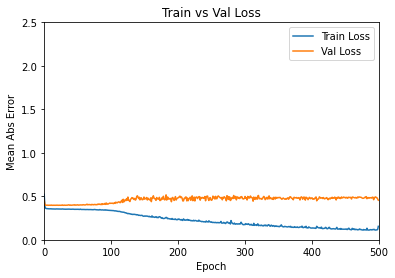

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot()
ax.plot(history.epoch, np.array(history.history['mae']),
           label='Train Loss')
ax.plot(history.epoch, np.array(history.history['val_mae']),
           label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.title('Train vs Val Loss')
plt.legend()
plt.ylim([0, 2.5])
plt.xlim([0, 500])
plt.show()
#fig.savefig(activation1 + '_' + activation2 + '_' + 'train_loss.png', dpi=400)

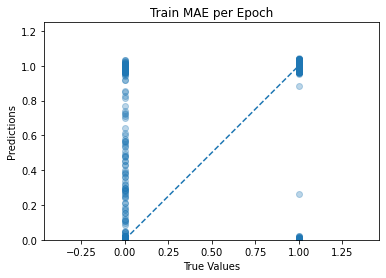

In [18]:
plt.scatter(y_train, train_pred, alpha = 0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title('Train MAE per Epoch')
plt.xlim(0, 1)
plt.ylim(0, 1.25)
plt.plot([0, 1], [0,1], '--')
#plt.savefig(activation1 + '_' + activation2 + '_' + 'true_vs_pred_train.png')

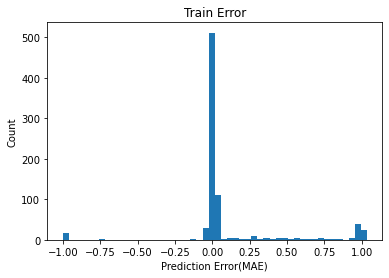

In [19]:
error = train_pred - y_train
plt.hist(error, bins = 50)
plt.title('Train Error')
plt.xlabel("Prediction Error(MAE)")
_ = plt.ylabel("Count")
#plt.savefig(activation1 + '_' + activation2 + '_' + 'train_error.png')

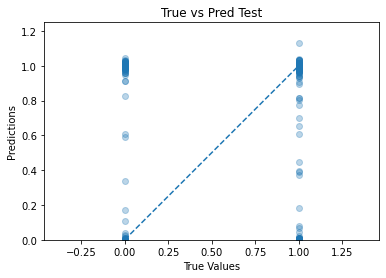

In [20]:
plt.scatter(y_test, pred, alpha = 0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.title('True vs Pred Test')
plt.xlim(0, 1)
plt.ylim(0, 1.25)
plt.plot([0, 1], [0,1], '--')
#plt.savefig(activation1 + '_' + activation2 + '_' + 'true_vs_pred_test.png')

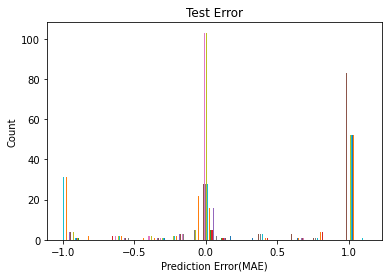

In [21]:
error = pred - y_test
plt.hist(error, bins = 50)
plt.title('Test Error')
plt.xlabel("Prediction Error(MAE)")
_ = plt.ylabel("Count")
#plt.savefig(activation1 + '_' + activation2 + '_' + 'test_error.png')

In [22]:
r_probs = [0 for _ in range(len(y_test))]

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
#Random chance ROC
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)

#Test ROC
fpr, tpr, _ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)


#Train ROC
tr_fpr, tr_tpr, _ = roc_curve(y_train, train_pred)
tr_auc = roc_auc_score(y_train, train_pred)

In [24]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Test Prediction: AUROC = %.3f' % (auc))
print('Train Prediction: AUROC = %.3f' % (tr_auc))

Random (chance) Prediction: AUROC = 0.500
Test Prediction: AUROC = 0.453
Train Prediction: AUROC = 0.913


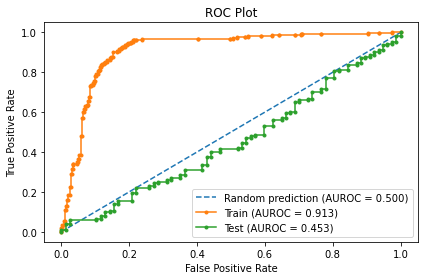

In [25]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(tr_fpr, tr_tpr, marker='.', label='Train (AUROC = %0.3f)' % tr_auc)
plt.plot(fpr, tpr, marker='.', label='Test (AUROC = %0.3f)' % auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(loc = 'lower right', prop={'size': 10}) 
plt.tight_layout()
#plt.savefig(activation1 + '_' + activation2 + '_' + 'ROC_Curve.png')

In [26]:
test_pred_int = np.where(pred<0.5, 0, 1)
train_pred_int = np.where(train_pred<0.5, 0, 1)

In [27]:
from sklearn.metrics import confusion_matrix
test_conf = confusion_matrix(y_test, test_pred_int)
train_conf = confusion_matrix(y_train, train_pred_int)

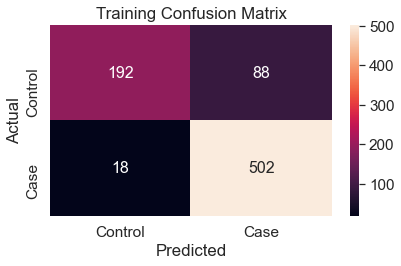

In [28]:
import seaborn as sns
df_cm = pd.DataFrame(train_conf, range(2), range(2))
df_cm = df_cm.rename(index={0: "Control", 1: "Case"})
df_cm = df_cm.rename(columns={0: "Control", 1: "Case"})
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Training Confusion Matrix')
plt.tight_layout()
#plt.savefig(activation1 + '_' + activation2 + '_' + 'confusion_matrix_train.png')

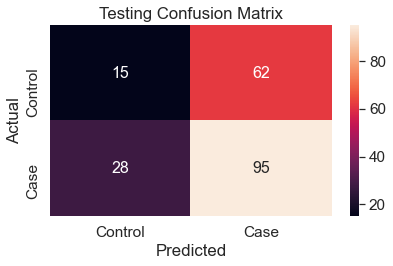

In [29]:
import seaborn as sns
df_cm = pd.DataFrame(test_conf, range(2), range(2))
df_cm = df_cm.rename(index={0: "Control", 1: "Case"})
df_cm = df_cm.rename(columns={0: "Control", 1: "Case"})
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g') # font size
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Testing Confusion Matrix')
plt.tight_layout()
#plt.savefig(activation1 + '_' + activation2 + '_' + 'confusion_matrix_test.png')